# Introduction to Regression with Neural Network in TensorFlow

There are many definitions for a regression problem but in our case we are going to simplyfy it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [1]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

# tf.config.set_visible_devices('GPU')
tf.config.list_physical_devices()

2.11.0


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
tf.config.set_visible_devices([],'GPU')

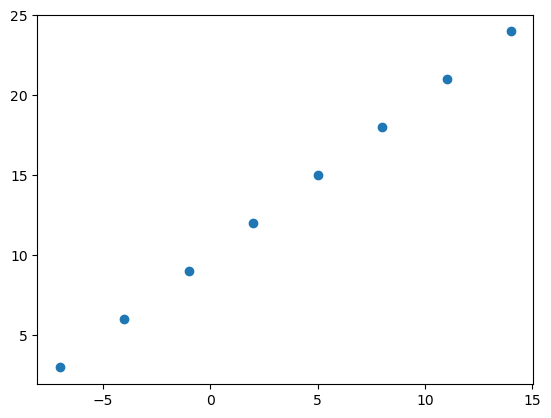

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# create futures
X = np.array([-7.0, -4.0, -1.0, 2.0,5.0,8.0,11.0,14.0])
y = np.array([3,6,9,12,15,18,21,24.0])

plt.scatter(X,y)

In [4]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [5]:
input_shape =X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

### steps in Modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a mdel - letting the model try to find patterns between X & y (features and labels).

In [6]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae')

# 3. Fit the Model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)

Epoch 1/5


2023-05-22 13:47:41.748840: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 288ms/step - loss: 9.6638
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 9.6496
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 9.6393
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 9.6306
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 9.6229


2023-05-22 13:47:41.951029: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x2818bbb10 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-05-22 13:47:41.951042: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2023-05-22 13:47:41.966126: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-22 13:47:42.059896: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [8]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 37ms/step


array([[18.824547]], dtype=float32)

In [10]:
y_pred+11

array([[29.824547]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number oh hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or peerhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
# Lets re-build our model
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

# 3. Fit the Model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 240ms/step - loss: 15.5997 - mae: 15.5997
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 14.7287 - mae: 14.7287
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 14.0880 - mae: 14.0880
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 13.4604 - mae: 13.4604
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 12.8410 - mae: 12.8410
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 12.2270 - mae: 12.2270
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 11.6158 - mae: 11.6158
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0052 - mae: 11.0052
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.3926 - mae: 10.3926
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 9.7752 - mae: 9.7752
Epoch 11/100
1/1 [==============================] - 0s 3ms/

In [12]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 32ms/step


array([[27.893055]], dtype=float32)

### Evalutaing a model

In practice a typical workflow you will go theough when building neural networks
> `Build a model -> fit it -> evaluate it -> tweak a model -> fit it ->  evaluate it...`

when it comes to evaluaition... there are 3 words you should memorize:
> "Visualize, Visualize, Visualize,"

its good idea to visualize:

 * The data - what data are we working with? What does it look like?
 * The model it self - what does our model look like?
 * The training of model - how does model perform while it learns?
 * The prediction of the model - how do the predictions of model line up against the ground truth (original labels)?

In [13]:
#  make a bigger data
X = tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [14]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

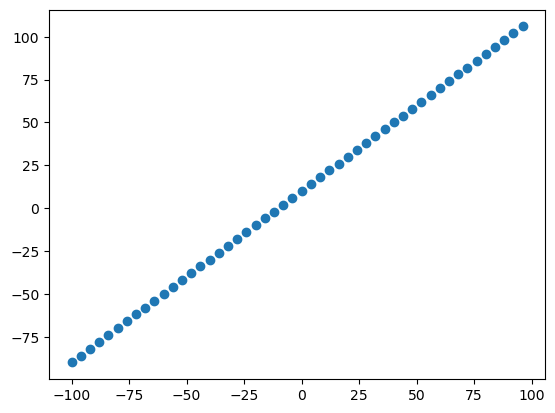

In [15]:
# visualize data
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [16]:
X_train=X[:40] 
X_test=X[40:]

y_train=y[:40]
y_test=y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)



(40, 10, 40, 10)

## Visualizing the data
Now we have got our data in training and test sets.. let's visualize it again

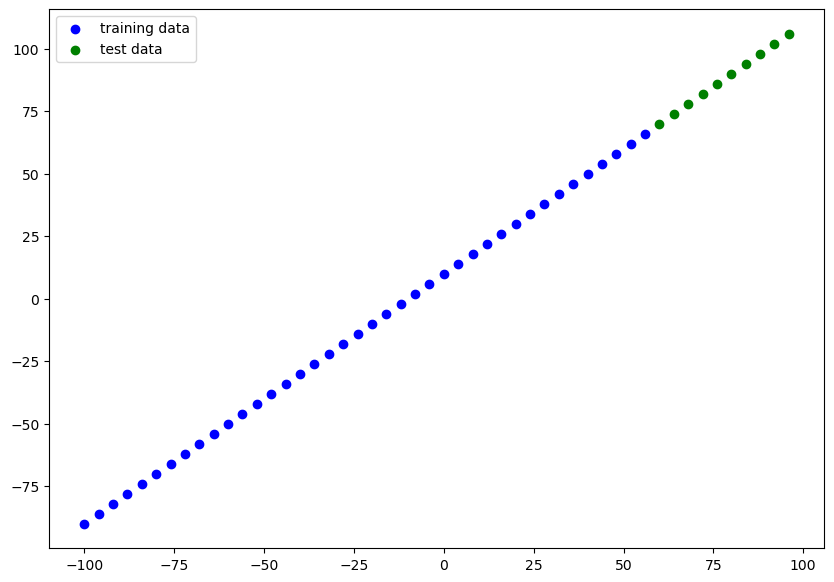

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label="training data")
plt.scatter(X_test, y_test, c='g', label="test data")
plt.legend();

In [18]:
# lets build a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss="mae", optimizer='adam', metrics=['mae'])

# model.fit((tf.expand_dims(X_train, axis=-1)), y_train, epochs=100)

Visualizing Model

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit((tf.expand_dims(X_train, axis=-1)), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 14.2464 - mae: 14.2464
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 14.1920 - mae: 14.1920
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 14.1453 - mae: 14.1453
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 14.0944 - mae: 14.0944
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 14.0466 - mae: 14.0466
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 13.9956 - mae: 13.9956
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 13.9446 - mae: 13.9446
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 13.8935 - mae: 13.8935
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 13.8578 - mae: 13.8578
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 13.8151 - mae: 13.8151
Epoch 11/100
2/2 [==============================] - 0s 1ms/

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Visualizing model prediction
To visualize predictions its a good idea to plot them against the ground truth labels.


In [24]:
# make some prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 24ms/step


array([[61.05255 ],
       [65.10928 ],
       [69.166016],
       [73.22275 ],
       [77.27947 ],
       [81.336205],
       [85.39294 ],
       [89.44967 ],
       [93.5064  ],
       [97.56313 ]], dtype=float32)

In [25]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [28]:
def plot_prefictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
    """
    Plots traing data, test data and compares predictions to ground truth albels
    """
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label="Training data")
    plt.scatter(test_data, test_labels, c='g', label="Test data")
    plt.scatter(test_data, predictions, c='r', label="Prediction")
    plt.legend()
    plt.show();

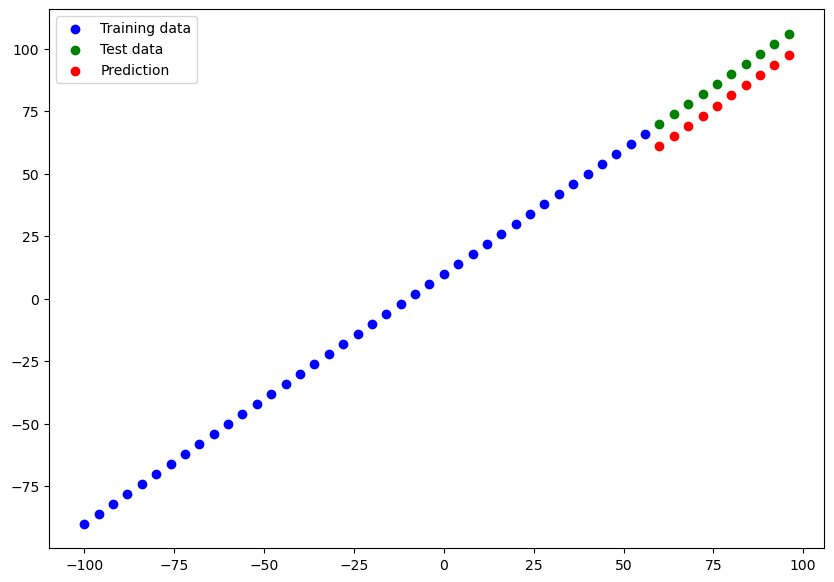

In [29]:
plot_prefictions()

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics

In [41]:
model_1 = Sequential()

model_1.add(Dense(1))

In [42]:
model_1.compile(loss='mae', optimizer='adam', metrics='mae')

In [43]:
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train)

2/2 [==============================] - 0s 2ms/step - loss: 12.2310 - mae: 12.2310


In [44]:
# plot_prefictions(predictions=model_1)
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 21ms/step


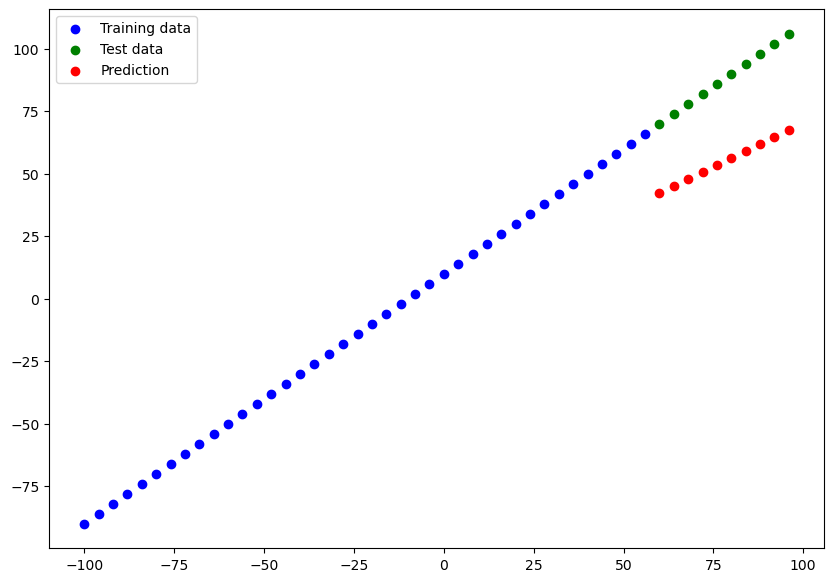

In [45]:
plot_prefictions(predictions=y_pred_1)

In [72]:
model_2 = Sequential()

In [73]:


model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(1,activation='linear'))

model_2.compile(loss='mae', optimizer='sgd', metrics='mse')

# model_2.summary()


In [74]:
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 43.8462 - mse: 2784.7261
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 19.5776 - mse: 551.5117
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 15.9332 - mse: 294.4742
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 7.2055 - mse: 80.2486
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 9.3004 - mse: 127.4965
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 9.8007 - mse: 128.8840
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 10.0327 - mse: 172.4886
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 12.7044 - mse: 250.3418
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 23.6928 - mse: 989.0021
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 11.1048 - mse: 184.4819
Epoch 11/100
2/2 [==============================] - 

In [75]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 25ms/step


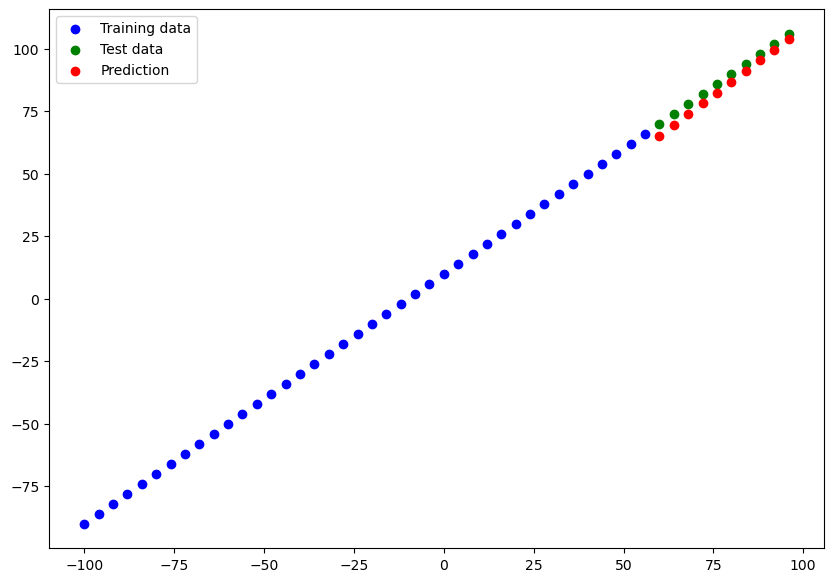

In [76]:
plot_prefictions(predictions=y_pred_2)

In [78]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
ohe = pd.get_dummies(df)
ohe.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
